In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load and process the data

Process the features(Some Pre-processing is already done we are using the final version of the CSV)

In [2]:
# Load the dataset
dataset = pd.read_csv('Radiomics/Final.csv')

# Remove unnecessary columns
dataset = dataset.drop(columns=['Image'])

# Identify columns to exclude from processing
exclude_columns = ['subject_ID', 'Grade']

# Identify non-numeric columns (i.e. not float64 or int64) for encoding
non_numeric_cols = dataset.select_dtypes(exclude=['float64', 'int64']).columns.tolist()
non_numeric_cols = [col for col in non_numeric_cols if col not in exclude_columns]

# Encode all non-numeric columns using LabelEncoder
label_encoder = LabelEncoder()
for col in non_numeric_cols:
    dataset[col] = label_encoder.fit_transform(dataset[col])

# Identify numeric columns for normalization (if needed)
numeric_cols = dataset.select_dtypes(include=['float64', 'int64']).columns.tolist()
numeric_cols = [col for col in numeric_cols if col not in exclude_columns]


Assign X and y and split data into Training tesing and Validation

In [3]:
# Separate features (X) and target (y)
X = dataset.drop(columns=['Grade', 'subject_ID'])
y = dataset['Grade']

# First, split into training (60%) and temporary set (40%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

# Next, split the temporary set equally into validation (20%) and testing (20%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


# Scale features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (885, 115) (885,)
Validation set shape: (295, 115) (295,)
Testing set shape: (296, 115) (296,)


# Train and Evaluate 

Support Vector Machine

Validation Accuracy: 0.7966101694915254
Validation Classification Report:
               precision    recall  f1-score   support

         HGG       0.79      0.99      0.88       222
         LGG       0.88      0.21      0.33        73

    accuracy                           0.80       295
   macro avg       0.84      0.60      0.61       295
weighted avg       0.81      0.80      0.74       295

Test Accuracy: 0.7905405405405406
Test Classification Report:
               precision    recall  f1-score   support

         HGG       0.80      0.98      0.88       231
         LGG       0.62      0.12      0.21        65

    accuracy                           0.79       296
   macro avg       0.71      0.55      0.54       296
weighted avg       0.76      0.79      0.73       296



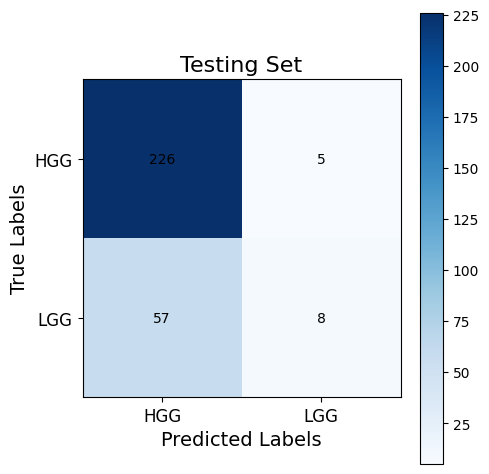

In [4]:
# Train the Support Vector Machine (SVM) 
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Evaluate on the validation set
y_val_pred = svm_model.predict(X_val_scaled)
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("Validation Classification Report:\n", classification_report(y_val, y_val_pred))

# Evaluate on the test set
y_test_pred = svm_model.predict(X_test_scaled)
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Test Classification Report:\n", classification_report(y_test, y_test_pred))

# Generate predictions for the test set 
y_test_pred = svm_model.predict(X_test_scaled)

# Compute confusion matrix for the testing set
cm_test = confusion_matrix(y_test, y_test_pred)

# Define the class labels and tick marks for plotting
classes = sorted(list(set(y_test)))
tick_marks = range(len(classes))

# Plot the Testing Set Confusion Matrix
plt.figure(figsize=(5, 5))
plt.imshow(cm_test, interpolation='nearest', cmap='Blues')
plt.title('Testing Set', fontsize=16)
plt.colorbar()

# Adding labels to the confusion matrix axes
plt.xticks(tick_marks, classes, fontsize=12)
plt.yticks(tick_marks, classes, fontsize=12)

# Add numeric values inside the cells of the confusion matrix
for i in range(cm_test.shape[0]):
    for j in range(cm_test.shape[1]):
        plt.text(j, i, format(cm_test[i, j], 'd'), ha="center", va="center", color="black")

plt.ylabel('True Labels', fontsize=14)
plt.xlabel('Predicted Labels', fontsize=14)
plt.tight_layout()
plt.show()

Decision Tree

Decision Tree Validation Accuracy: 0.7661016949152543
Decision Tree Validation Classification Report:
               precision    recall  f1-score   support

         HGG       0.84      0.86      0.85       222
         LGG       0.53      0.49      0.51        73

    accuracy                           0.77       295
   macro avg       0.68      0.67      0.68       295
weighted avg       0.76      0.77      0.76       295

Decision Tree Test Accuracy: 0.7702702702702703
Decision Tree Test Classification Report:
               precision    recall  f1-score   support

         HGG       0.86      0.85      0.85       231
         LGG       0.48      0.49      0.48        65

    accuracy                           0.77       296
   macro avg       0.67      0.67      0.67       296
weighted avg       0.77      0.77      0.77       296



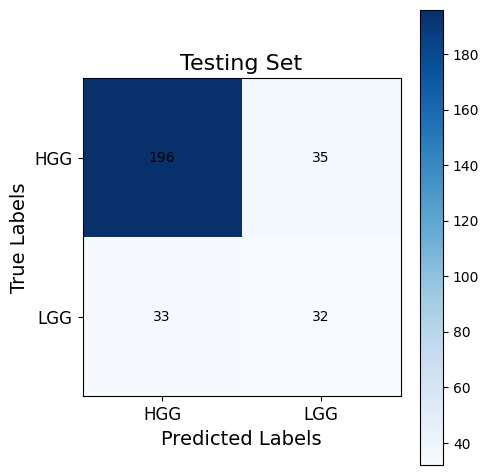

In [5]:
# Train the Decision Tree 
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Evaluate on the validation set
y_val_pred_dt = dt_model.predict(X_val)
print("Decision Tree Validation Accuracy:", accuracy_score(y_val, y_val_pred_dt))
print("Decision Tree Validation Classification Report:\n", classification_report(y_val, y_val_pred_dt))

# Evaluate on the test set
y_test_pred_dt = dt_model.predict(X_test)
print("Decision Tree Test Accuracy:", accuracy_score(y_test, y_test_pred_dt))
print("Decision Tree Test Classification Report:\n", classification_report(y_test, y_test_pred_dt))

# Compute confusion matrix for the testing set
cm_test_dt = confusion_matrix(y_test, y_test_pred_dt)

# Define the class labels and tick marks for plotting
classes = sorted(list(set(y_test)))
tick_marks = range(len(classes))

# Plot the Testing Set Confusion Matrix for Decision Tree
plt.figure(figsize=(5, 5))
plt.imshow(cm_test_dt, interpolation='nearest', cmap='Blues')
plt.title('Testing Set', fontsize=16)
plt.colorbar()

# Adding labels to the confusion matrix axes
plt.xticks(tick_marks, classes, fontsize=12)
plt.yticks(tick_marks, classes, fontsize=12)

# Add numeric values inside the cells of the confusion matrix
for i in range(cm_test_dt.shape[0]):
    for j in range(cm_test_dt.shape[1]):
        plt.text(j, i, format(cm_test_dt[i, j], 'd'), ha="center", va="center", color="black")

plt.ylabel('True Labels', fontsize=14)
plt.xlabel('Predicted Labels', fontsize=14)
plt.tight_layout()
plt.show()

GradientBoosting

Gradient Boosting Validation Accuracy: 0.8610169491525423
Gradient Boosting Validation Classification Report:
               precision    recall  f1-score   support

         HGG       0.86      0.97      0.91       222
         LGG       0.86      0.52      0.65        73

    accuracy                           0.86       295
   macro avg       0.86      0.75      0.78       295
weighted avg       0.86      0.86      0.85       295

Gradient Boosting Test Accuracy: 0.902027027027027
Gradient Boosting Test Classification Report:
               precision    recall  f1-score   support

         HGG       0.90      0.98      0.94       231
         LGG       0.89      0.63      0.74        65

    accuracy                           0.90       296
   macro avg       0.90      0.80      0.84       296
weighted avg       0.90      0.90      0.90       296



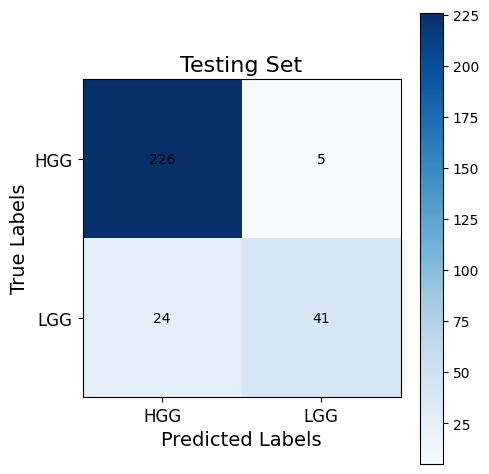

In [6]:
# Train the Gradient Boosting classifier
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Evaluate on the validation set
y_val_pred_gb = gb_model.predict(X_val)
print("Gradient Boosting Validation Accuracy:", accuracy_score(y_val, y_val_pred_gb))
print("Gradient Boosting Validation Classification Report:\n", classification_report(y_val, y_val_pred_gb))

# Evaluate on the test set
y_test_pred_gb = gb_model.predict(X_test)
print("Gradient Boosting Test Accuracy:", accuracy_score(y_test, y_test_pred_gb))
print("Gradient Boosting Test Classification Report:\n", classification_report(y_test, y_test_pred_gb))

# Compute confusion matrix for the testing set
cm_test_gb = confusion_matrix(y_test, y_test_pred_gb)

# Define the class labels and tick marks for plotting
classes = sorted(list(set(y_test)))
tick_marks = range(len(classes))

# Plot the Testing Set Confusion Matrix for Gradient Boosting
plt.figure(figsize=(5, 5))
plt.imshow(cm_test_gb, interpolation='nearest', cmap='Blues')
plt.title('Testing Set', fontsize=16)
plt.colorbar()

# Adding labels to the confusion matrix axes
plt.xticks(tick_marks, classes, fontsize=12)
plt.yticks(tick_marks, classes, fontsize=12)

# Add numeric values inside the cells of the confusion matrix
for i in range(cm_test_gb.shape[0]):
    for j in range(cm_test_gb.shape[1]):
        plt.text(j, i, format(cm_test_gb[i, j], 'd'), ha="center", va="center", color="black")

plt.ylabel('True Labels', fontsize=14)
plt.xlabel('Predicted Labels', fontsize=14)
plt.tight_layout()
plt.show()

---------------------------------------------------------------------------------------------

# Applying SMOT (Synthetic Minority Over-sampling Technique)

In [7]:
from imblearn.over_sampling import SMOTE
# Initialize SMOTE with a fixed random state 
smote = SMOTE(random_state=42)

# Apply SMOTE on the training set only
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

# Scale features for SVM (recommended)
scaler = StandardScaler()
X_train_sm_scaled = scaler.fit_transform(X_train_sm)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# View the new class distribution
print("Original training set class distribution:")
print(y_train.value_counts())
print("\nAfter SMOTE class distribution:")
print(pd.Series(y_train_sm).value_counts())

Original training set class distribution:
Grade
HGG    719
LGG    166
Name: count, dtype: int64

After SMOTE class distribution:
Grade
HGG    719
LGG    719
Name: count, dtype: int64


SVM Validation Accuracy: 0.7796610169491526
SVM Validation Classification Report:
               precision    recall  f1-score   support

         HGG       0.92      0.77      0.84       222
         LGG       0.54      0.79      0.64        73

    accuracy                           0.78       295
   macro avg       0.73      0.78      0.74       295
weighted avg       0.83      0.78      0.79       295

SVM Test Accuracy: 0.7635135135135135
SVM Test Classification Report:
               precision    recall  f1-score   support

         HGG       0.93      0.76      0.83       231
         LGG       0.48      0.78      0.59        65

    accuracy                           0.76       296
   macro avg       0.70      0.77      0.71       296
weighted avg       0.83      0.76      0.78       296



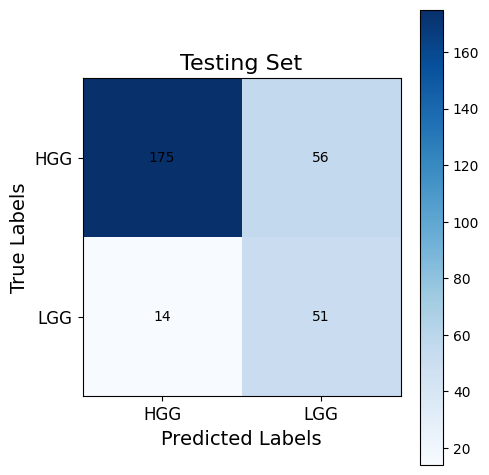

In [8]:
# Train the SVM classifier using the SMOTE training data
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train_sm_scaled, y_train_sm)

# Evaluate on the validation set
y_val_pred_svm = svm_model.predict(X_val_scaled)
print("SVM Validation Accuracy:", accuracy_score(y_val, y_val_pred_svm))
print("SVM Validation Classification Report:\n", classification_report(y_val, y_val_pred_svm))

# Evaluate on the test set
y_test_pred_svm = svm_model.predict(X_test_scaled)
print("SVM Test Accuracy:", accuracy_score(y_test, y_test_pred_svm))
print("SVM Test Classification Report:\n", classification_report(y_test, y_test_pred_svm))

# Optionally, plot the test set confusion matrix
cm_test_svm = confusion_matrix(y_test, y_test_pred_svm)
classes = sorted(list(set(y_test)))
tick_marks = range(len(classes))

plt.figure(figsize=(5, 5))
plt.imshow(cm_test_svm, interpolation='nearest', cmap='Blues')
plt.title('Testing Set', fontsize=16)
plt.colorbar()
plt.xticks(tick_marks, classes, fontsize=12)
plt.yticks(tick_marks, classes, fontsize=12)
for i in range(cm_test_svm.shape[0]):
    for j in range(cm_test_svm.shape[1]):
        plt.text(j, i, format(cm_test_svm[i, j], 'd'), ha="center", va="center", color="black")
plt.ylabel('True Labels', fontsize=14)
plt.xlabel('Predicted Labels', fontsize=14)
plt.tight_layout()
plt.show()

 Decision Tree

Decision Tree Validation Accuracy: 0.735593220338983
Decision Tree Validation Classification Report:
               precision    recall  f1-score   support

         HGG       0.86      0.77      0.81       222
         LGG       0.47      0.63      0.54        73

    accuracy                           0.74       295
   macro avg       0.67      0.70      0.68       295
weighted avg       0.77      0.74      0.75       295

Decision Tree Test Accuracy: 0.7601351351351351
Decision Tree Test Classification Report:
               precision    recall  f1-score   support

         HGG       0.89      0.79      0.84       231
         LGG       0.47      0.66      0.55        65

    accuracy                           0.76       296
   macro avg       0.68      0.72      0.69       296
weighted avg       0.80      0.76      0.77       296



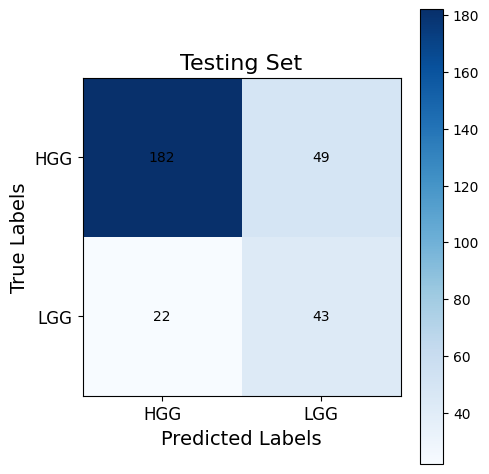

In [9]:
# Train the Decision Tree classifier using the SMOTE training data
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_sm, y_train_sm)

# Evaluate on the validation set
y_val_pred_dt = dt_model.predict(X_val)
print("Decision Tree Validation Accuracy:", accuracy_score(y_val, y_val_pred_dt))
print("Decision Tree Validation Classification Report:\n", classification_report(y_val, y_val_pred_dt))

# Evaluate on the test set
y_test_pred_dt = dt_model.predict(X_test)
print("Decision Tree Test Accuracy:", accuracy_score(y_test, y_test_pred_dt))
print("Decision Tree Test Classification Report:\n", classification_report(y_test, y_test_pred_dt))

# Optionally, plot the test set confusion matrix
cm_test_dt = confusion_matrix(y_test, y_test_pred_dt)
classes = sorted(list(set(y_test)))
tick_marks = range(len(classes))

plt.figure(figsize=(5, 5))
plt.imshow(cm_test_dt, interpolation='nearest', cmap='Blues')
plt.title('Testing Set', fontsize=16)
plt.colorbar()
plt.xticks(tick_marks, classes, fontsize=12)
plt.yticks(tick_marks, classes, fontsize=12)
for i in range(cm_test_dt.shape[0]):
    for j in range(cm_test_dt.shape[1]):
        plt.text(j, i, format(cm_test_dt[i, j], 'd'), ha="center", va="center", color="black")
plt.ylabel('True Labels', fontsize=14)
plt.xlabel('Predicted Labels', fontsize=14)
plt.tight_layout()
plt.show()

Gradient Boosting Validation Accuracy: 0.8169491525423729
Gradient Boosting Validation Classification Report:
               precision    recall  f1-score   support

         HGG       0.90      0.85      0.87       222
         LGG       0.61      0.73      0.66        73

    accuracy                           0.82       295
   macro avg       0.76      0.79      0.77       295
weighted avg       0.83      0.82      0.82       295

Gradient Boosting Test Accuracy: 0.8682432432432432
Gradient Boosting Test Classification Report:
               precision    recall  f1-score   support

         HGG       0.94      0.88      0.91       231
         LGG       0.66      0.82      0.73        65

    accuracy                           0.87       296
   macro avg       0.80      0.85      0.82       296
weighted avg       0.88      0.87      0.87       296



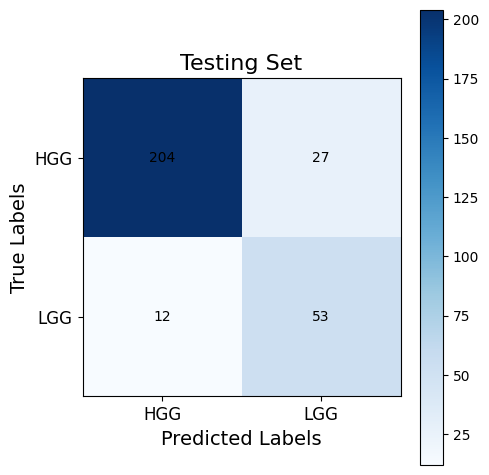

In [10]:
# Train the Gradient Boosting classifier using the SMOTE training data
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_sm, y_train_sm)

# Evaluate on the validation set
y_val_pred_gb = gb_model.predict(X_val)
print("Gradient Boosting Validation Accuracy:", accuracy_score(y_val, y_val_pred_gb))
print("Gradient Boosting Validation Classification Report:\n", classification_report(y_val, y_val_pred_gb))

# Evaluate on the test set
y_test_pred_gb = gb_model.predict(X_test)
print("Gradient Boosting Test Accuracy:", accuracy_score(y_test, y_test_pred_gb))
print("Gradient Boosting Test Classification Report:\n", classification_report(y_test, y_test_pred_gb))

# Optionally, plot the test set confusion matrix
cm_test_gb = confusion_matrix(y_test, y_test_pred_gb)
classes = sorted(list(set(y_test)))
tick_marks = range(len(classes))

plt.figure(figsize=(5, 5))
plt.imshow(cm_test_gb, interpolation='nearest', cmap='Blues')
plt.title('Testing Set', fontsize=16)
plt.colorbar()
plt.xticks(tick_marks, classes, fontsize=12)
plt.yticks(tick_marks, classes, fontsize=12)
for i in range(cm_test_gb.shape[0]):
    for j in range(cm_test_gb.shape[1]):
        plt.text(j, i, format(cm_test_gb[i, j], 'd'), ha="center", va="center", color="black")
plt.ylabel('True Labels', fontsize=14)
plt.xlabel('Predicted Labels', fontsize=14)
plt.tight_layout()
plt.show()

---------------------------------------------------------------------------------------------

# Applying the mean method 

In [11]:
#    - For 'subject_ID' and 'Grade': use 'first'
#    - For numeric columns: use 'mean'
#    - For any other non-numeric columns: use 'first'
agg_dict = {}
for col in dataset.columns:
    if col in ['subject_ID', 'Grade']:
        agg_dict[col] = 'first'
    elif pd.api.types.is_numeric_dtype(dataset[col]):
        agg_dict[col] = 'mean'
    else:
        agg_dict[col] = 'first'

# Group by subject_ID and aggregate
dataset_grouped = dataset.groupby('subject_ID', as_index=False).agg(agg_dict)

# Separate features and target:
#    - Drop 'subject_ID' and 'Grade' from features; y will be 'Grade'
X = dataset_grouped.drop(columns=['subject_ID', 'Grade'])
y = dataset_grouped['Grade']

print("Aggregated X shape:", X.shape)
print("Aggregated y shape:", y.shape)

# Identify non-numeric columns in X for encoding
non_numeric_cols = X.select_dtypes(exclude=['float64', 'int64']).columns.tolist()

# Encode non-numeric columns using LabelEncoder
label_encoder = LabelEncoder()
for col in non_numeric_cols:
    X[col] = label_encoder.fit_transform(X[col])

# StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training (60%), validation (20%), and test (20%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Aggregated X shape: (369, 115)
Aggregated y shape: (369,)
Training set shape: (221, 115) (221,)
Validation set shape: (74, 115) (74,)
Test set shape: (74, 115) (74,)


SVM Validation Accuracy: 0.8243243243243243
SVM Validation Classification Report:
               precision    recall  f1-score   support

         HGG       0.84      0.98      0.90        62
         LGG       0.00      0.00      0.00        12

    accuracy                           0.82        74
   macro avg       0.42      0.49      0.45        74
weighted avg       0.70      0.82      0.76        74

SVM Test Accuracy: 0.8108108108108109
SVM Test Classification Report:
               precision    recall  f1-score   support

         HGG       0.83      0.97      0.89        60
         LGG       0.50      0.14      0.22        14

    accuracy                           0.81        74
   macro avg       0.66      0.55      0.56        74
weighted avg       0.77      0.81      0.77        74



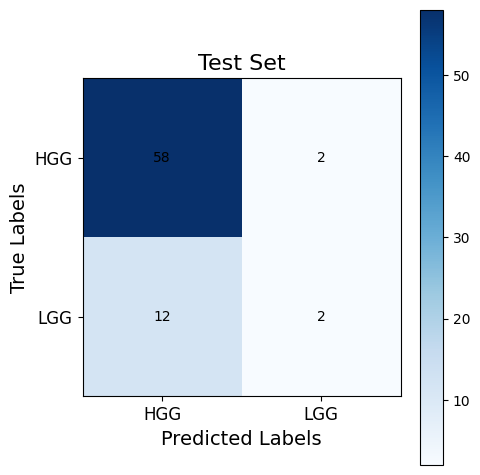

In [12]:
# Train the SVM classifier on the scaled training data
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)

# Evaluate on the validation set
y_val_pred = svm_model.predict(X_val)
print("SVM Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("SVM Validation Classification Report:\n", classification_report(y_val, y_val_pred))

# Evaluate on the test set
y_test_pred = svm_model.predict(X_test)
print("SVM Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("SVM Test Classification Report:\n", classification_report(y_test, y_test_pred))

# Plot confusion matrix for the test set
cm = confusion_matrix(y_test, y_test_pred)
classes = sorted(list(set(y_test)))
tick_marks = range(len(classes))

plt.figure(figsize=(5, 5))
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title('Test Set', fontsize=16)
plt.colorbar()
plt.xticks(tick_marks, classes, fontsize=12)
plt.yticks(tick_marks, classes, fontsize=12)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
         plt.text(j, i, format(cm[i, j], 'd'), ha="center", va="center", color="black")
plt.ylabel('True Labels', fontsize=14)
plt.xlabel('Predicted Labels', fontsize=14)
plt.tight_layout()
plt.show()

Decision Tree Validation Accuracy: 0.7972972972972973
Decision Tree Validation Classification Report:
               precision    recall  f1-score   support

         HGG       0.93      0.82      0.87        62
         LGG       0.42      0.67      0.52        12

    accuracy                           0.80        74
   macro avg       0.67      0.74      0.69        74
weighted avg       0.85      0.80      0.81        74

Decision Tree Test Accuracy: 0.7432432432432432
Decision Tree Test Classification Report:
               precision    recall  f1-score   support

         HGG       0.87      0.80      0.83        60
         LGG       0.37      0.50      0.42        14

    accuracy                           0.74        74
   macro avg       0.62      0.65      0.63        74
weighted avg       0.78      0.74      0.76        74



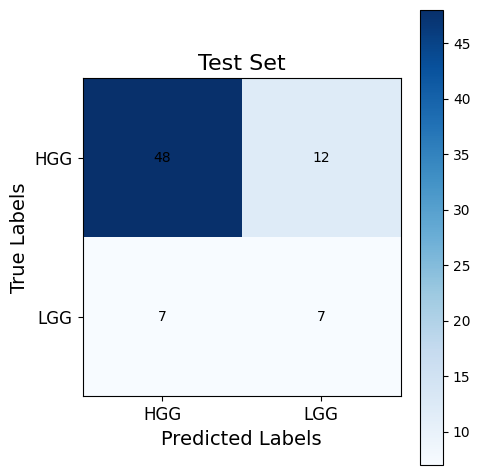

In [13]:
# Train the Decision Tree classifier using the same training splits
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Evaluate on the validation set
y_val_pred_dt = dt_model.predict(X_val)
print("Decision Tree Validation Accuracy:", accuracy_score(y_val, y_val_pred_dt))
print("Decision Tree Validation Classification Report:\n", classification_report(y_val, y_val_pred_dt))

# Evaluate on the test set
y_test_pred_dt = dt_model.predict(X_test)
print("Decision Tree Test Accuracy:", accuracy_score(y_test, y_test_pred_dt))
print("Decision Tree Test Classification Report:\n", classification_report(y_test, y_test_pred_dt))

# Plot confusion matrix for the test set
cm_dt = confusion_matrix(y_test, y_test_pred_dt)
classes = sorted(list(set(y_test)))
tick_marks = range(len(classes))

plt.figure(figsize=(5, 5))
plt.imshow(cm_dt, interpolation='nearest', cmap='Blues')
plt.title('Test Set', fontsize=16)
plt.colorbar()
plt.xticks(tick_marks, classes, fontsize=12)
plt.yticks(tick_marks, classes, fontsize=12)
for i in range(cm_dt.shape[0]):
    for j in range(cm_dt.shape[1]):
         plt.text(j, i, format(cm_dt[i, j], 'd'), ha="center", va="center", color="black")
plt.ylabel('True Labels', fontsize=14)
plt.xlabel('Predicted Labels', fontsize=14)
plt.tight_layout()
plt.show()

Gradient Boosting Validation Accuracy: 0.7837837837837838
Gradient Boosting Validation Classification Report:
               precision    recall  f1-score   support

         HGG       0.90      0.84      0.87        62
         LGG       0.38      0.50      0.43        12

    accuracy                           0.78        74
   macro avg       0.64      0.67      0.65        74
weighted avg       0.81      0.78      0.80        74

Gradient Boosting Test Accuracy: 0.7702702702702703
Gradient Boosting Test Classification Report:
               precision    recall  f1-score   support

         HGG       0.94      0.77      0.84        60
         LGG       0.44      0.79      0.56        14

    accuracy                           0.77        74
   macro avg       0.69      0.78      0.70        74
weighted avg       0.84      0.77      0.79        74



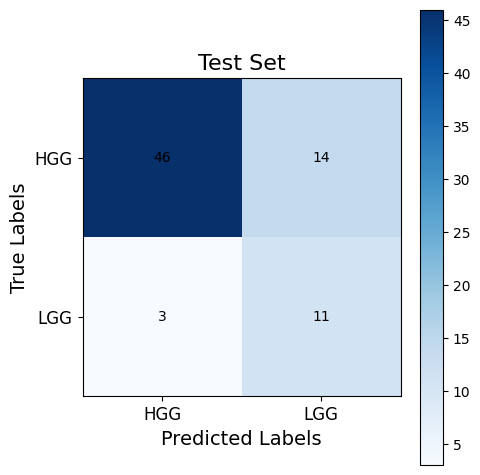

In [14]:
# Train the Gradient Boosting classifier using the same training splits
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Evaluate on the validation set
y_val_pred_gb = gb_model.predict(X_val)
print("Gradient Boosting Validation Accuracy:", accuracy_score(y_val, y_val_pred_gb))
print("Gradient Boosting Validation Classification Report:\n", classification_report(y_val, y_val_pred_gb))

# Evaluate on the test set
y_test_pred_gb = gb_model.predict(X_test)
print("Gradient Boosting Test Accuracy:", accuracy_score(y_test, y_test_pred_gb))
print("Gradient Boosting Test Classification Report:\n", classification_report(y_test, y_test_pred_gb))

# Plot confusion matrix for the test set
cm_gb = confusion_matrix(y_test, y_test_pred_gb)
classes = sorted(list(set(y_test)))
tick_marks = range(len(classes))

plt.figure(figsize=(5, 5))
plt.imshow(cm_gb, interpolation='nearest', cmap='Blues')
plt.title('Test Set', fontsize=16)
plt.colorbar()
plt.xticks(tick_marks, classes, fontsize=12)
plt.yticks(tick_marks, classes, fontsize=12)
for i in range(cm_gb.shape[0]):
    for j in range(cm_gb.shape[1]):
         plt.text(j, i, format(cm_gb[i, j], 'd'), ha="center", va="center", color="black")
plt.ylabel('True Labels', fontsize=14)
plt.xlabel('Predicted Labels', fontsize=14)
plt.tight_layout()
plt.show()

------------------------------------------------------------------------------------------------------------------------------------------------------

# SMOT for mean

In [15]:
# Apply SMOTE to the training set after mean aggregation
sm = SMOTE(random_state=42)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

print("After SMOTE, training set shape:", X_train_smote.shape, y_train_smote.shape)


After SMOTE, training set shape: (342, 115) (342,)


SVM Validation Metrics:
              precision    recall  f1-score   support

         HGG       0.96      0.84      0.90        62
         LGG       0.50      0.83      0.62        12

    accuracy                           0.84        74
   macro avg       0.73      0.84      0.76        74
weighted avg       0.89      0.84      0.85        74

SVM Test Metrics:
              precision    recall  f1-score   support

         HGG       0.94      0.80      0.86        60
         LGG       0.48      0.79      0.59        14

    accuracy                           0.80        74
   macro avg       0.71      0.79      0.73        74
weighted avg       0.85      0.80      0.81        74



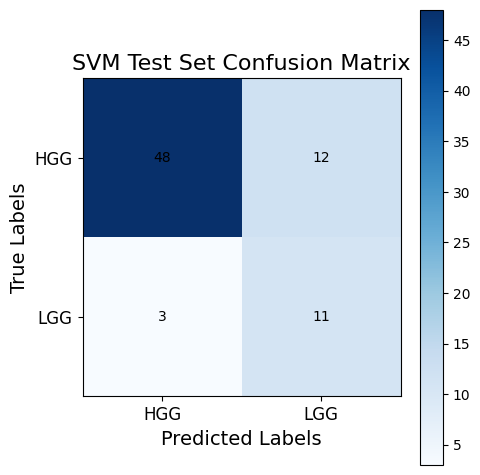

In [16]:
# Initialize the SVM classifier with a fixed random_state for reproducibility
svm_model = SVC(random_state=42)
svm_model.fit(X_train_smote, y_train_smote)

# Evaluate on the validation set
y_val_pred_svm = svm_model.predict(X_val)
print("SVM Validation Metrics:")
print(classification_report(y_val, y_val_pred_svm))

# Evaluate on the test set
y_test_pred_svm = svm_model.predict(X_test)
print("SVM Test Metrics:")
print(classification_report(y_test, y_test_pred_svm))


# Compute confusion matrix for SVM
cm_svm = confusion_matrix(y_test, y_test_pred_svm)

plt.figure(figsize=(5, 5))
plt.imshow(cm_svm, interpolation='nearest', cmap='Blues')
plt.title('SVM Test Set Confusion Matrix', fontsize=16)
plt.colorbar()
plt.xticks(tick_marks, classes, fontsize=12)
plt.yticks(tick_marks, classes, fontsize=12)
for i in range(cm_svm.shape[0]):
    for j in range(cm_svm.shape[1]):
        plt.text(j, i, format(cm_svm[i, j], 'd'),
                 ha="center", va="center", color="black")
plt.ylabel('True Labels', fontsize=14)
plt.xlabel('Predicted Labels', fontsize=14)
plt.tight_layout()
plt.show()

Decision Tree Validation Metrics:
              precision    recall  f1-score   support

         HGG       0.91      0.82      0.86        62
         LGG       0.39      0.58      0.47        12

    accuracy                           0.78        74
   macro avg       0.65      0.70      0.67        74
weighted avg       0.83      0.78      0.80        74

Decision Tree Test Metrics:
              precision    recall  f1-score   support

         HGG       0.91      0.72      0.80        60
         LGG       0.37      0.71      0.49        14

    accuracy                           0.72        74
   macro avg       0.64      0.72      0.65        74
weighted avg       0.81      0.72      0.74        74



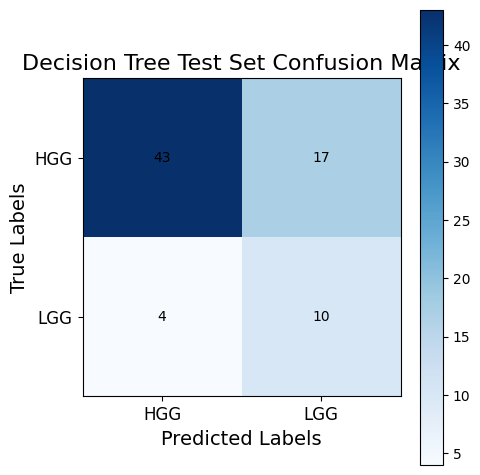

In [17]:
# Initialize the Decision Tree classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_smote, y_train_smote)

# Evaluate on the validation set
y_val_pred_dt = dt_model.predict(X_val)
print("Decision Tree Validation Metrics:")
print(classification_report(y_val, y_val_pred_dt))

# Evaluate on the test set
y_test_pred_dt = dt_model.predict(X_test)
print("Decision Tree Test Metrics:")
print(classification_report(y_test, y_test_pred_dt))

# Compute confusion matrix for Decision Tree
cm_dt = confusion_matrix(y_test, y_test_pred_dt)

plt.figure(figsize=(5, 5))
plt.imshow(cm_dt, interpolation='nearest', cmap='Blues')
plt.title('Decision Tree Test Set Confusion Matrix', fontsize=16)
plt.colorbar()
plt.xticks(tick_marks, classes, fontsize=12)
plt.yticks(tick_marks, classes, fontsize=12)
for i in range(cm_dt.shape[1]):
    for j in range(cm_dt.shape[0]):
        plt.text(j, i, format(cm_dt[i, j], 'd'),
                 ha="center", va="center", color="black")
plt.ylabel('True Labels', fontsize=14)
plt.xlabel('Predicted Labels', fontsize=14)
plt.tight_layout()
plt.show()



Gradient Boosting Validation Metrics:
              precision    recall  f1-score   support

         HGG       0.93      0.87      0.90        62
         LGG       0.50      0.67      0.57        12

    accuracy                           0.84        74
   macro avg       0.72      0.77      0.74        74
weighted avg       0.86      0.84      0.85        74

Gradient Boosting Test Metrics:
              precision    recall  f1-score   support

         HGG       0.96      0.75      0.84        60
         LGG       0.44      0.86      0.59        14

    accuracy                           0.77        74
   macro avg       0.70      0.80      0.71        74
weighted avg       0.86      0.77      0.79        74



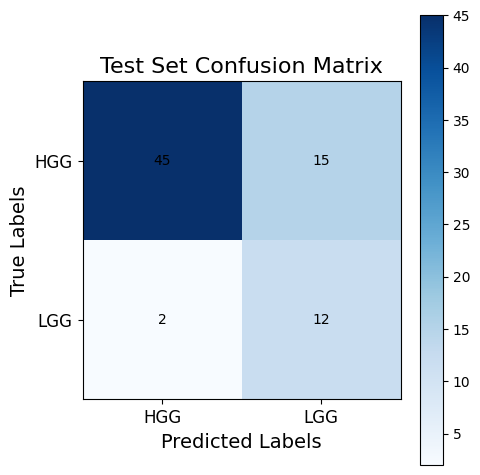

In [18]:
# Initialize the Gradient Boosting classifier
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_smote, y_train_smote)

# Evaluate on the validation set
y_val_pred_gb = gb_model.predict(X_val)
print("Gradient Boosting Validation Metrics:")
print(classification_report(y_val, y_val_pred_gb))

# Evaluate on the test set
y_test_pred_gb = gb_model.predict(X_test)
print("Gradient Boosting Test Metrics:")
print(classification_report(y_test, y_test_pred_gb))

# Compute confusion matrix for Gradient Boosting
cm_gb = confusion_matrix(y_test, y_test_pred_gb)

plt.figure(figsize=(5, 5))
plt.imshow(cm_gb, interpolation='nearest', cmap='Blues')
plt.title('Test Set Confusion Matrix', fontsize=16)
plt.colorbar()
plt.xticks(tick_marks, classes, fontsize=12)
plt.yticks(tick_marks, classes, fontsize=12)
for i in range(cm_gb.shape[1]):
    for j in range(cm_gb.shape[0]):
        plt.text(j, i, format(cm_gb[i, j], 'd'),
                 ha="center", va="center", color="black")
plt.ylabel('True Labels', fontsize=14)
plt.xlabel('Predicted Labels', fontsize=14)
plt.tight_layout()
plt.show()

